## Sources
- https://gist.github.com/tartakynov/83f3cd8f44208a1856ce
- https://www.youtube.com/watch?time_continue=9&v=bn8rVBuIcFg
- https://www.youtube.com/watch?v=VYpAodcdFfA
- https://ipython-books.github.io/101-analyzing-the-frequency-components-of-a-signal-with-a-fast-fourier-transform/

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

cal_df = pd.read_csv("calendar.csv")
sales_df = pd.read_csv("sales_train_validation.csv")
sample_df = pd.read_csv("sample_submission.csv")
sell_df = pd.read_csv("sell_prices.csv")

In [3]:
print(cal_df.shape)
cal_df.head()

(1969, 14)


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [4]:
print(sales_df.shape)
sales_df.head()

(30490, 1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [46]:
sales_df["id"].nunique() 

30490

In [47]:
print(sample_df["id"].nunique() )
print(sample_df.shape)
sample_df.head()

60980
(60980, 29)


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:

sell_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


## Some basic Data Exploration

Some things I want to explore:
- Random item sales over time
- Sales by category 
- Sales by State over time
- Total sales over time

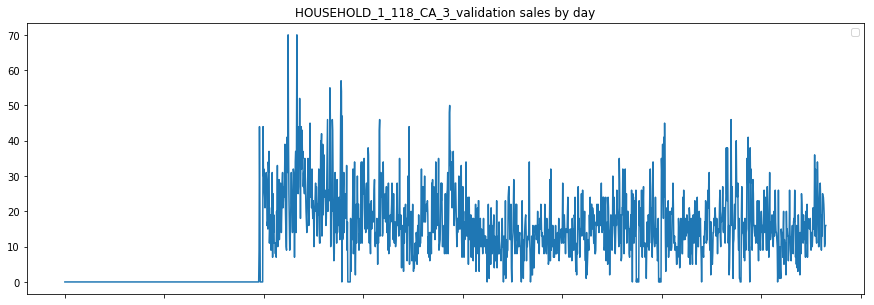

In [398]:
# plt.style.use('bmh')
d_cols = [c for c in sales_df.columns if 'd_' in c] # sales data columns

sales_df.loc[sales_df['id'] == 'HOUSEHOLD_1_447_CA_3_validation'].set_index('id')[d_cols].T.plot(figsize=(15, 5),title='HOUSEHOLD_1_118_CA_3_validation sales by day',)
#           color=next(color_cycle))
plt.legend('')
plt.show()

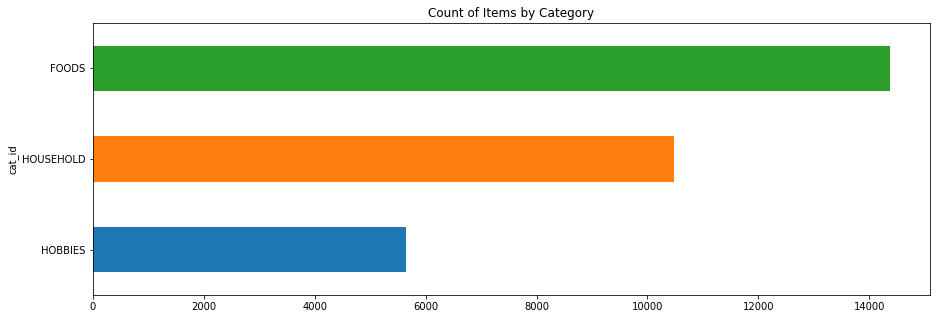

In [51]:
sales_df.groupby('cat_id').count()['id'].sort_values().plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

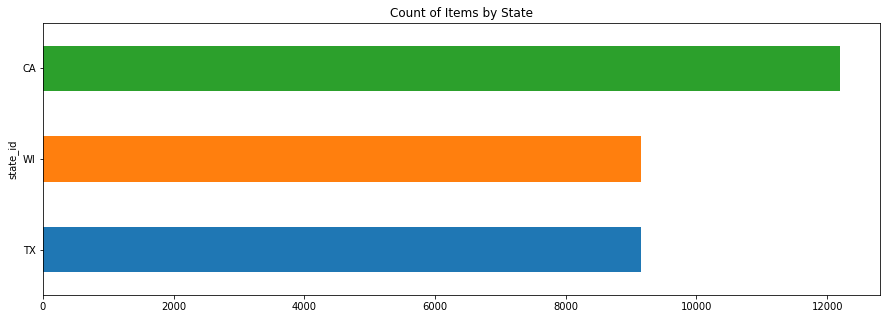

In [52]:
sales_df.groupby('state_id').count()['id'].sort_values().plot(kind='barh', figsize=(15, 5), title='Count of Items by State')
plt.show()

In [54]:
# Only 3 states?? yep

df = sales_df.groupby('state_id')['id'].nunique()
print(df)

state_id
CA    12196
TX     9147
WI     9147
Name: id, dtype: int64


# Lets try some models
- FFT --> Simple and predicts periodicity well
- Deep Learning

## Fast Fourier Transform (example) with random product

In [55]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = sales_df.iloc[3,6:1889]
df_test = sales_df.iloc[3,1889:]

date = list(sales_df)[6:1889]
print(df_test.shape)

(30,)


In [29]:
# calculating the FFT
df_fft = sp.fftpack.fft(df)

In [30]:
# Power spectral density
df_psd = np.abs(df_fft) ** 2

In [31]:
fftfreq = sp.fftpack.fftfreq(len(df_psd), 1. / 365)

In [32]:
i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

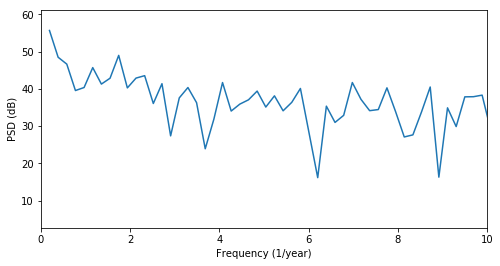

In [33]:
# Plot of the frequencies of the harmonic decompositions
ig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(df_psd[i]))
ax.set_xlim(0, 10)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [34]:
df_fft_bis = df_fft.copy()
df_fft_bis[np.abs(fftfreq) > 8] = 0 # selecting the frequencies below 8... higher frequencies account for more noise

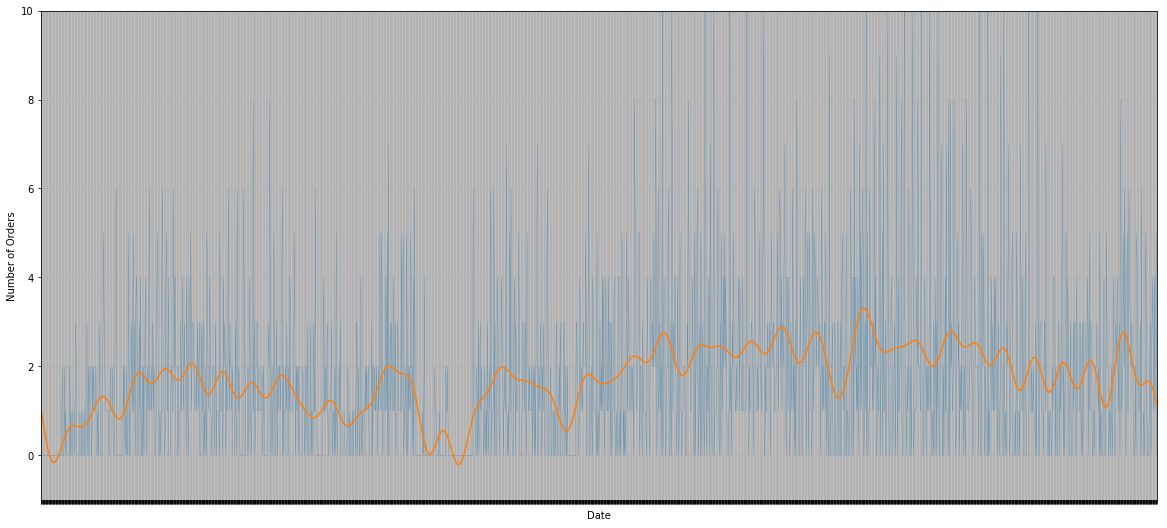

In [35]:
# Plot an inverse FFT given the selected frequencies
df_slow = np.real(sp.fftpack.ifft(df_fft_bis))
fig, ax = plt.subplots(1, 1, figsize=(20, 9))
df.plot(ax=ax, lw=.2)

ax.plot_date(date, df_slow, '-')
ax.set_xlim("d_1","d_1883")
ax.set_ylim(-1, 10)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')
plt.grid(b=None)

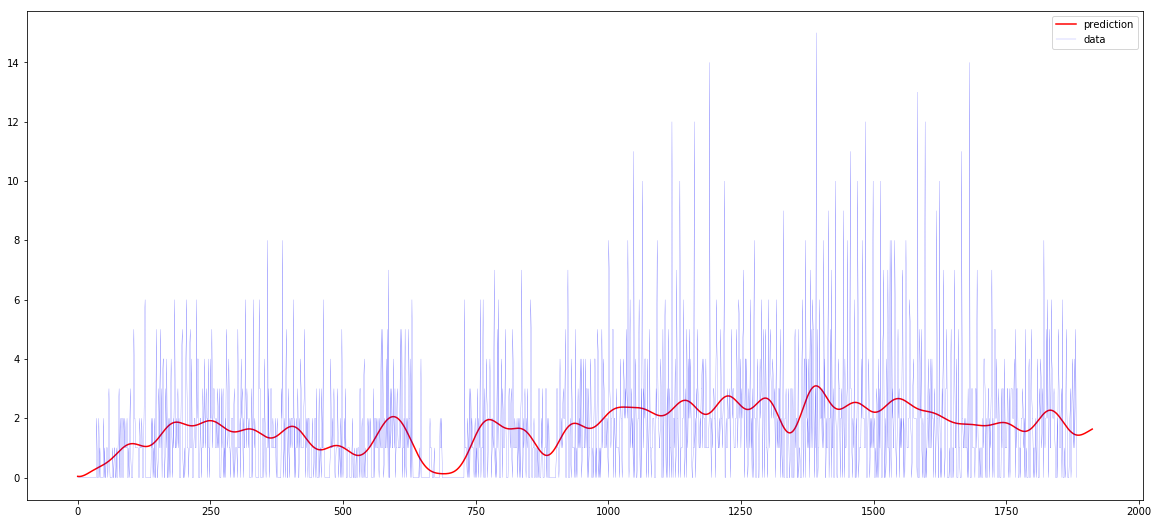

In [39]:
# function for extrapolating FFT
# from https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict, n_harm):
    n = x.size
#     n_harm  -->                   number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = []
    indexes.extend(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    

x = df.values.astype(float)
n_predict = 30
extrapolation = fourierExtrapolation(x, n_predict, 25)
pl.figure(figsize = (20, 9))
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'prediction')
pl.plot(np.arange(0, x.size), x, 'b', label = 'data', linewidth = .15)
pl.legend()
pl.show()


In [45]:
# Calculate RMSE for this particular product forecast
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE = sqrt(mean_squared_error(df_test, extrapolation[-30:]))
print(RMSE)

2.148134576106631


## Fast Fourier Transform model prediction with all products

In [419]:
# Populate prediction_df with results of FFT extrapolation

rows = sales_df["id"]
columns = ["id"]

for i in range(1884, 1914):
    columns.append("d_" + str(i))
columns.append("RMSE")

df_pred = pd.DataFrame(columns=columns)
df_pred = df_pred.astype(float)
df_pred["id"] = df_pred["id"].astype(object)

df_pred["id"] = rows
df_pred = df_pred.fillna(0)

df_pred.head()

,id,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,RMSE
0,HOBBIES_1_001_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,HOBBIES_1_002_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,HOBBIES_1_003_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HOBBIES_1_004_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HOBBIES_1_005_CA_1_validation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# Loop through the products, populate the predictions and RMSE
# Hyperparameter: number of harmonics (25 for now...)
# This takes some time... :/

for row in df_pred.iterrows():
    cur_df = sales_df.iloc[row[0],6:1889]
    df_test = sales_df.iloc[row[0],1889:]
    
    extrapolation = fourierExtrapolation(cur_df.values.astype(float), 30, 25) # calculate Fourier predicted sales for 1913 days
    
    df_pred.iloc[row[0],1:31] = extrapolation[-30:] # populate df with predicted sales for last 30 days
    
    df_pred.at[row[0],"RMSE"] = sqrt(mean_squared_error(df_test, extrapolation[-30:])) # calculate and update RMSE


In [140]:
df_pred.head()

,id,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,RMSE
0,HOBBIES_1_001_CA_1_validation,1.085989,1.082775,1.079271,1.075503,1.071496,1.067276,1.062871,1.058308,1.053613,...,0.992246,0.988279,0.984507,0.980942,0.977595,0.974474,0.971585,0.968935,0.966527,1.087537
1,HOBBIES_1_002_CA_1_validation,0.327016,0.324670,0.321738,0.318246,0.314224,0.309705,0.304722,0.299314,0.293521,...,0.203582,0.197156,0.191018,0.185205,0.179751,0.174689,0.170048,0.165853,0.162129,0.347526
2,HOBBIES_1_003_CA_1_validation,0.593873,0.586127,0.578124,0.569941,0.561655,0.553342,0.545077,0.536931,0.528975,...,0.467813,0.467638,0.468190,0.469461,0.471442,0.474114,0.477459,0.481449,0.486054,0.689947
3,HOBBIES_1_004_CA_1_validation,1.432882,1.430310,1.428856,1.428487,1.429163,1.430840,1.433473,1.437010,1.441401,...,1.550730,1.561263,1.571863,1.582495,1.593124,1.603725,1.614271,1.624742,1.635122,2.148135
4,HOBBIES_1_005_CA_1_validation,0.777197,0.757711,0.738894,0.720808,0.703510,0.687048,0.671465,0.656796,0.643069,...,0.549366,0.547632,0.546414,0.545638,0.545233,0.545122,0.545228,0.545474,0.545782,1.431571


In [141]:
avg_RMSE = df_pred["RMSE"].mean()
print(avg_RMSE)

1.5514433686031037


## About this model
- Simplistic, assumes that the demand for a product is harmonic, and can be decomposed
- Hyperparameters: n_harm => number of harmonic functions the demand can be decomposed into. The greater the number, the more noise is accounted for, and potential for overfitting.

We can do better if we tune for the best hyperparameter. Here it is possible to do it manually

In [143]:
# Trying hyperparameters 15-75
hp = {}
for i in range(15, 75, 4):
    for row in df_pred.iterrows():
        cur_df = sales_df.iloc[row[0],6:1889]
        df_test = sales_df.iloc[row[0],1889:]

        extrapolation = fourierExtrapolation(cur_df.values.astype(float), 30, i) # calculate Fourier predicted sales for 1913 days

        df_pred.iloc[row[0],1:31] = extrapolation[-30:] # populate df with predicted sales for last 30 days

        df_pred.at[row[0],"RMSE"] = sqrt(mean_squared_error(df_test, extrapolation[-30:])) # calculate and update RMSE
    hp[i] = df_pred["RMSE"].mean()

In [145]:
print(hp)

{15: 1.4937537624063417, 19: 1.519100067654234, 23: 1.5402555878686837, 27: 1.559297843755068, 31: 1.577149619652072, 35: 1.59278330636499, 39: 1.6053000712986318, 43: 1.615145607137642, 47: 1.6273598210753455, 51: 1.6334955852961943, 55: 1.6400268103249644, 59: 1.6459931742330938, 63: 1.6478977986220895, 67: 1.6515288269791326, 71: 1.6559580105127607}


Lowest RMSE was using 15 harmonic functions with RMSE of 1.4937537624063417


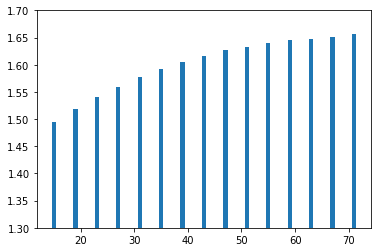

In [158]:
import matplotlib.pyplot as plt

plt.bar(hp.keys(), list(hp.values()), align='center')
plt.ylim(1.3, 1.7)

min_val = min(hp.values())
print("Lowest RMSE was using " + str(min(hp, key=hp.get)) + " harmonic functions with RMSE of " + str(min_val))

Seems like the lower n_harm number the better performance. Lets try again with lower hyperparameters...

In [ ]:
# Trying with parameters 1-15
hp = {}
for i in range(1, 15, 2):
    for row in df_pred.iterrows():
        cur_df = sales_df.iloc[row[0],6:1889]
        df_test = sales_df.iloc[row[0],1889:]

        extrapolation = fourierExtrapolation(cur_df.values.astype(float), 30, i) # calculate Fourier predicted sales for 1913 days

        df_pred.iloc[row[0],1:31] = extrapolation[-30:] # populate df with predicted sales for last 30 days

        df_pred.at[row[0],"RMSE"] = sqrt(mean_squared_error(df_test, extrapolation[-30:])) # calculate and update RMSE
    hp[i] = df_pred["RMSE"].mean()

Lowest RMSE was using 1 harmonic functions with RMSE of 1.4545777229234043


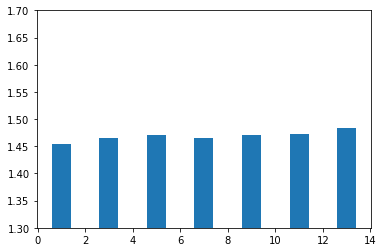

In [161]:
import matplotlib.pyplot as plt

plt.bar(hp.keys(), list(hp.values()), align='center')
plt.ylim(1.3, 1.7)

min_val = min(hp.values())
print("Lowest RMSE was using " + str(min(hp, key=hp.get)) + " harmonic function(s) with RMSE of " + str(min_val))

In [163]:
for x in hp:
    print(str(x) + ": "+ str(hp[x]))
df_pred.head()

1: 1.4545777229234043
3: 1.4648471050692597
5: 1.4715607390182919
7: 1.4655329153799435
9: 1.470916511595197
11: 1.47243596608267
13: 1.4832850726560958


,id,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,...,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,RMSE
0,HOBBIES_1_001_CA_1_validation,0.994796,0.994264,0.993736,0.993214,0.992700,0.992197,0.991706,0.991229,0.990768,...,0.986738,0.986605,0.986499,0.986420,0.986368,0.986342,0.986342,0.986367,0.986417,1.080306
1,HOBBIES_1_002_CA_1_validation,0.178498,0.179368,0.180313,0.181330,0.182415,0.183564,0.184772,0.186036,0.187351,...,0.207269,0.208876,0.210474,0.212060,0.213631,0.215182,0.216710,0.218213,0.219687,0.349919
2,HOBBIES_1_003_CA_1_validation,0.407597,0.412837,0.418216,0.423723,0.429350,0.435086,0.440922,0.446846,0.452851,...,0.533637,0.539726,0.545752,0.551706,0.557581,0.563368,0.569059,0.574647,0.580125,0.645496
3,HOBBIES_1_004_CA_1_validation,1.702458,1.698248,1.694180,1.690261,1.686501,1.682906,1.679486,1.676247,1.673198,...,1.653964,1.654264,1.654844,1.655707,1.656856,1.658296,1.660029,1.662058,1.664385,2.114642
4,HOBBIES_1_005_CA_1_validation,0.653102,0.644933,0.637001,0.629313,0.621878,0.614701,0.607790,0.601151,0.594790,...,0.539332,0.537254,0.535495,0.534053,0.532927,0.532117,0.531619,0.531433,0.531556,1.445556


In [164]:
# Cross validate using last 50 values instead of last 30...
hp = {}
for i in range(1, 10, 2):
    for row in df_pred.iterrows():
        cur_df = sales_df.iloc[row[0],6:1869]
        df_test = sales_df.iloc[row[0],1869:]

        # calculate Fourier predicted sales for 1863+50=1913 days
        extrapolation = fourierExtrapolation(cur_df.values.astype(float), 50, i) 
        
        df_pred.at[row[0],"RMSE"] = sqrt(mean_squared_error(df_test, extrapolation[-50:])) # calculate and update RMSE
    hp[i] = df_pred["RMSE"].mean()

In [166]:
for x in hp:
    print(str(x) + ": "+ str(hp[x]))


1: 1.4677198905100024
3: 1.4868436441974926
5: 1.5015570939455767
7: 1.5035710496900097
9: 1.5127050036215997


Lowest RMSE was using 1 harmonic functions with RMSE of 1.4677198905100024


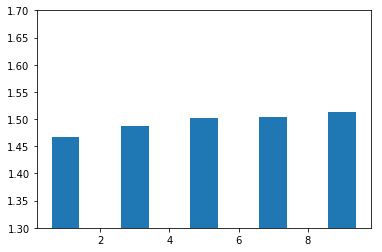

In [167]:
import matplotlib.pyplot as plt

plt.bar(hp.keys(), list(hp.values()), align='center')
plt.ylim(1.3, 1.7)

min_val = min(hp.values())
print("Lowest RMSE was using " + str(min(hp, key=hp.get)) + " harmonic functions with RMSE of " + str(min_val))

In [169]:
# Cross validate using last 100 values instead of last 50...
hp = {}
for i in range(1, 10, 2):
    for row in df_pred.iterrows():
        cur_df = sales_df.iloc[row[0],6:1819]
        df_test = sales_df.iloc[row[0],1819:]

        # calculate Fourier predicted sales for 1863+50=1913 days
        extrapolation = fourierExtrapolation(cur_df.values.astype(float), 100, i) 
        
        df_pred.at[row[0],"RMSE"] = sqrt(mean_squared_error(df_test, extrapolation[-100:])) # calculate and update RMSE
    hp[i] = df_pred["RMSE"].mean()

In [171]:
for x in hp:
    print(str(x) + ": "+ str(hp[x]))

1: 1.4927568128304818
3: 1.526066741691679
5: 1.555840879655132
7: 1.5749330427010881
9: 1.58943515688446


Lowest RMSE was using 1 harmonic functions with RMSE of 1.4927568128304818


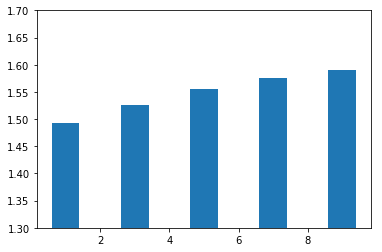

In [180]:
import matplotlib.pyplot as plt

plt.bar(hp.keys(), list(hp.values()), align='center')
plt.ylim(1.3, 1.7)

min_val = min(hp.values())
print("Lowest RMSE was using " + str(min(hp, key=hp.get)) + " harmonic functions with RMSE of " + str(min_val))

We found that 1 harmonic function led to the lowest RMSE of ~1.47 using FFT

# Lets try LSTM (Long Short-Term Memory Network)


Once again, let's begin by building a model for a specific product, and then generalize to all the products

Sources
- https://keras.io/getting-started/sequential-model-guide/
- https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- https://machinelearningmastery.com/keras-functional-api-deep-learning/


In [355]:
import pandas
import tensorflow
import numpy
import matplotlib.pyplot as plt
from numpy import array
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [417]:
# multi-step data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# Set up data and preprocess into samples

df = sales_df.iloc[36,6:1889]
df_val = sales_df.iloc[36,1889:]



df_train = df.values 
df_val = df_val.values.astype(float) # Last 30 values

# Scale the data -- LSTM is pretty sensitive
# df_train = scale( df_train.astype(float), axis=0, with_mean=True, with_std=True, copy=True )

# Use first 1000 values to train

X_train = df_train[:1000]

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = X_train.reshape(-1, 1)
X_train = scaler.fit_transform(X_train)

X_train = np.squeeze(np.asarray(X_train))




n_steps_in = 70
n_steps_out = 30
X, y = split_sequence(X_train, n_steps_in, n_steps_out)


# for i in range(len(X)):
#     print(X[i], y[i])

# reshape from [samples, timesteps] into [samples, timesteps, features]
X = numpy.reshape(X, (X.shape[0], X.shape[1], 1))



C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Using a vector output model for Multi-Step LSTM

In [358]:
from keras import optimizers
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, 1)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))

# Manually set lower learning rate to avoid exploding gradients problem
adam = optimizers.Adam(learning_rate=0.0007, clipnorm=1, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=adam, loss='mse')

# fit the model
model.fit(X, y, batch_size=128,epochs=10, verbose=1)

Epoch 1/10
901/901 [==============================] - 15s 16ms/step - loss: 0.0458
Epoch 2/10
901/901 [==============================] - 5s 6ms/step - loss: 0.0382
Epoch 3/10
901/901 [==============================] - 5s 5ms/step - loss: 0.0311
Epoch 4/10
901/901 [==============================] - 6s 6ms/step - loss: 0.0277
Epoch 5/10
901/901 [==============================] - 5s 6ms/step - loss: 0.0259
Epoch 6/10
901/901 [==============================] - 5s 5ms/step - loss: 0.0251
Epoch 7/10
901/901 [==============================] - 5s 6ms/step - loss: 0.0248
Epoch 8/10
901/901 [==============================] - 5s 6ms/step - loss: 0.0247
Epoch 9/10
901/901 [==============================] - 6s 7ms/step - loss: 0.0250
Epoch 10/10
901/901 [==============================] - 6s 7ms/step - loss: 0.0249


In [414]:
# Test the model...
x_input = df_train[950:1020]
x_input = x_input.reshape(-1, 1)
x_input = scaler.transform(x_input)

x_input = np.squeeze(np.asarray(x_input))

# print(x_input)
x_input = x_input.reshape((1, n_steps_in, 1))

ytrue = df_train[1020:1050]
# ytrue = ytrue.reshape(-1,1)
# ytrue = scaler.inverse_transform(ytrue)
# ytrue = np.squeeze(np.asarray(ytrue))

# ytrue = scale( ytrue.astype(float), axis=0, with_mean=True, with_std=True, copy=True )
yhat = model.predict(x_input, verbose=0)

# print(yhat)
yhat = scaler.inverse_transform(yhat)
yhat = np.squeeze(np.asarray(yhat))



print("RMSE for the 30day prediction using 70d as input = " + str(math.sqrt(mean_squared_error(yhat, ytrue))))


RMSE for the 30day prediction using 70d as input = 1.076903226984867


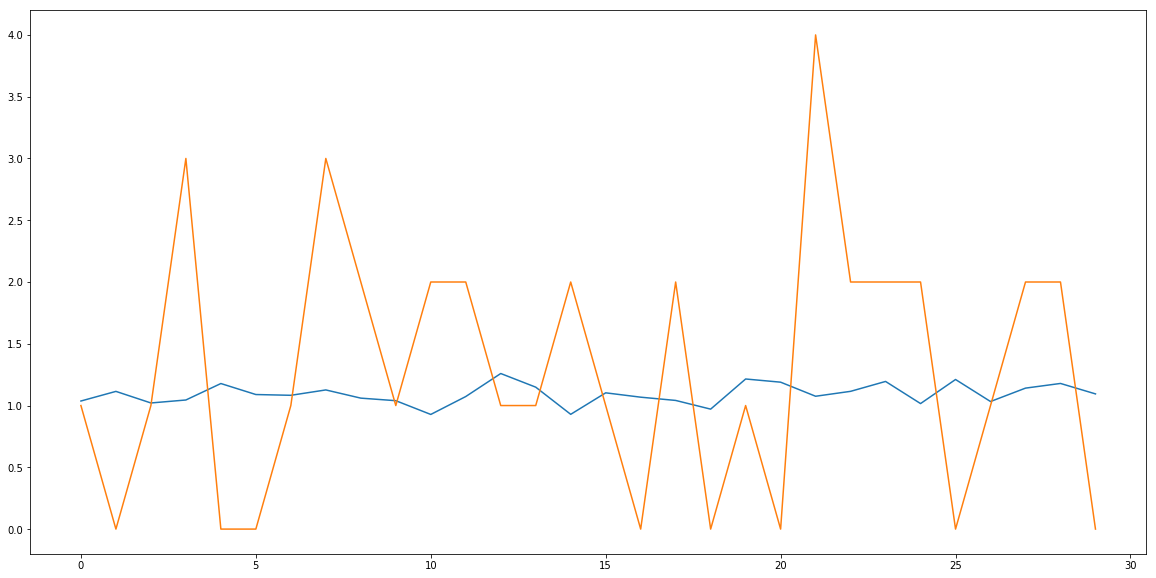

In [361]:
# xtest = np.squeeze(np.asarray(np.asmatrix(X_test)))
# xtestpredict = np.squeeze(np.asarray(np.asmatrix(testPredict)))
dates = range(30)

plt.figure(figsize=(20,10))
plt.plot(dates, yhat)
plt.plot(dates, ytrue)

## Generalize to all the products

In [367]:
# Populate prediction_df with results of FFT extrapolation

rows = sales_df["id"]
columns = ["id"]

# for i in range(1884, 1914):
#     columns.append("d_" + str(i))
columns.append("RMSE")

pred_df = pd.DataFrame(columns=columns)
pred_df = pred_df.astype(float)
pred_df["id"] = pred_df["id"].astype(object)

pred_df["id"] = rows
pred_df = pred_df.fillna(0)

pred_df.head()

,id,RMSE
0,HOBBIES_1_001_CA_1_validation,0.0
1,HOBBIES_1_002_CA_1_validation,0.0
2,HOBBIES_1_003_CA_1_validation,0.0
3,HOBBIES_1_004_CA_1_validation,0.0
4,HOBBIES_1_005_CA_1_validation,0.0


In [379]:
# Function that trains a model for product
# Inputs: X_train as an array

def get_RMSE(X_train, x_input, ytrue, product):

    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = X_train.reshape(-1, 1)
    X_train = scaler.fit_transform(X_train)

    X_train = np.squeeze(np.asarray(X_train))

    n_steps_in = 70
    n_steps_out = 30
    X, y = split_sequence(X_train, n_steps_in, n_steps_out)

    # reshape from [samples, timesteps] into [samples, timesteps, features]
    X = numpy.reshape(X, (X.shape[0], X.shape[1], 1))
    
    # define model
    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, 1)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(n_steps_out))

    # Manually set lower learning rate to avoid exploding gradients problem
    adam = optimizers.Adam(learning_rate=0.0007, clipnorm=1, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam, loss='mse')

    # fit the model
    model.fit(X, y, batch_size=128,epochs=10, verbose=0)
    
    
    x_input = x_input.reshape(-1, 1)
    x_input = scaler.transform(x_input) # scale data according to training data
    x_input = np.squeeze(np.asarray(x_input))
    x_input = x_input.reshape((1, n_steps_in, 1))

    
    yhat = model.predict(x_input, verbose=0) # prediction

    yhat = scaler.inverse_transform(yhat)
    yhat = np.squeeze(np.asarray(yhat))

    err = math.sqrt(mean_squared_error(yhat, ytrue))
    print("RMSE for the 30day prediction of " + product + " using 70d as input = " + str(err))
    
    
    return err




In [420]:
# Loop through the products, train a model for each product
# Here we only are training a model for a random 30 products
# This takes some time... :/
from random import random

for row in pred_df.iterrows():
    if(random() <= .005):
        cur_df = sales_df.iloc[row[0],6:1889]
        df_test = sales_df.iloc[row[0],1889:]


        X_train = cur_df[-1000:].values

        x_input = cur_df[-70:].values

        y_true = df_test.values

        error = get_RMSE(X_train, x_input, ytrue, row[1][0]) # calculate Fourier predicted sales for 1913 days

        pred_df.at[row[0],"RMSE"] = error # calculate and update RMSE


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_090_CA_1_validation using 70d as input = 2.3454535856181553


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_160_CA_1_validation using 70d as input = 1.304723764154332


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_016_CA_1_validation using 70d as input = 1.6102031123484515


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_043_CA_1_validation using 70d as input = 1.201857943230009


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_046_CA_1_validation using 70d as input = 1.0404935701285778


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_082_CA_1_validation using 70d as input = 1.0419739476782337


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_145_CA_1_validation using 70d as input = 1.1999990043837634


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_395_CA_1_validation using 70d as input = 1.3384402304141476


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_035_CA_1_validation using 70d as input = 1.3391448623225257


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_079_CA_1_validation using 70d as input = 1.4514737730134504


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_089_CA_1_validation using 70d as input = 1.5845357867030616


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_305_CA_1_validation using 70d as input = 1.5180209864910015


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_364_CA_1_validation using 70d as input = 1.536625402585597


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_056_CA_1_validation using 70d as input = 1.4652235947351067


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_139_CA_1_validation using 70d as input = 2.268539173119596


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_154_CA_1_validation using 70d as input = 2.5295178493761123


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_167_CA_1_validation using 70d as input = 1.26328176479107


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_202_CA_1_validation using 70d as input = 1.1385155003360028


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_220_CA_1_validation using 70d as input = 1.1006619348370064


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_236_CA_1_validation using 70d as input = 1.3305434175479467


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_268_CA_2_validation using 70d as input = 2.9840684857640993


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_361_CA_2_validation using 70d as input = 1.4461912592740362


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_147_CA_2_validation using 70d as input = 1.3628371243963333


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_276_CA_2_validation using 70d as input = 1.4819908135055413


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_298_CA_2_validation using 70d as input = 2.0140337973396867


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_440_CA_2_validation using 70d as input = 1.0792989527094066


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_459_CA_2_validation using 70d as input = 5.1257195436780005


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_440_CA_2_validation using 70d as input = 1.4343901094983822


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_019_CA_2_validation using 70d as input = 1.6873166892845048


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_374_CA_2_validation using 70d as input = 1.0244893238514232


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_431_CA_2_validation using 70d as input = 1.1334720861513379


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_588_CA_2_validation using 70d as input = 1.055760005129805


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_299_CA_3_validation using 70d as input = 1.4751872356703553


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_015_CA_3_validation using 70d as input = 1.551434555284121


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_080_CA_3_validation using 70d as input = 1.5550654090174698


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_084_CA_3_validation using 70d as input = 1.3040089133673303


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_496_CA_3_validation using 70d as input = 1.1786220946067145


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_047_CA_3_validation using 70d as input = 1.6010022330965528


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_133_CA_3_validation using 70d as input = 6.463474967959413


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_384_CA_3_validation using 70d as input = 1.2563420516455908


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_507_CA_3_validation using 70d as input = 1.4050089406380177


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_316_CA_4_validation using 70d as input = 1.3505502187519767


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_139_CA_4_validation using 70d as input = 1.6164565707443193


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_055_CA_4_validation using 70d as input = 1.034287838505705


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_460_CA_4_validation using 70d as input = 1.4032751762854552


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_006_CA_4_validation using 70d as input = 1.6334854832507


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_358_CA_4_validation using 70d as input = 1.6112638442058582


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_439_CA_4_validation using 70d as input = 1.4224239038354793


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_246_CA_4_validation using 70d as input = 1.591421701120338


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_394_CA_4_validation using 70d as input = 1.5013790230614854


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_305_CA_4_validation using 70d as input = 1.0883186515841725


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_500_CA_4_validation using 70d as input = 1.565424961619314


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_681_CA_4_validation using 70d as input = 5.721141038040691


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_121_TX_1_validation using 70d as input = 1.3798892225178594


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_181_TX_1_validation using 70d as input = 1.6354636492935999


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_234_TX_1_validation using 70d as input = 6.373598940855016


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_257_TX_1_validation using 70d as input = 1.464017243203439


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_008_TX_1_validation using 70d as input = 1.5149422497349845


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_105_TX_1_validation using 70d as input = 1.4425840244218633


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_289_TX_1_validation using 70d as input = 1.3296350899016798


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_316_TX_1_validation using 70d as input = 1.1718300221762694


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_058_TX_1_validation using 70d as input = 1.5159375833470574


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_384_TX_1_validation using 70d as input = 1.084565959855558


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_431_TX_1_validation using 70d as input = 1.3784994792213723


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_501_TX_1_validation using 70d as input = 1.4898429517698526


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_338_TX_1_validation using 70d as input = 1.1003249455519282


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_199_TX_1_validation using 70d as input = 1.3097086511987714


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_334_TX_1_validation using 70d as input = 1.10385823874152


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_754_TX_1_validation using 70d as input = 1.38620905744053


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_128_TX_2_validation using 70d as input = 1.3523355580151235


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_353_TX_2_validation using 70d as input = 1.1230227943066904


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_133_TX_2_validation using 70d as input = 1.4505400323933613


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_514_TX_2_validation using 70d as input = 3.7888939247252544


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_058_TX_2_validation using 70d as input = 1.4307513286282312


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_100_TX_2_validation using 70d as input = 1.6169085738421025


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_335_TX_2_validation using 70d as input = 1.1792581687471215


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_350_TX_2_validation using 70d as input = 1.3947801444247754


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_268_TX_2_validation using 70d as input = 1.530343036092641


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_107_TX_2_validation using 70d as input = 1.285534173178925


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_349_TX_2_validation using 70d as input = 4.723660991223254


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_097_TX_3_validation using 70d as input = 1.3321474756158427


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_288_TX_3_validation using 70d as input = 1.2196565176711145


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_080_TX_3_validation using 70d as input = 1.5769318377613044


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_388_TX_3_validation using 70d as input = 1.423989604117108


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_455_TX_3_validation using 70d as input = 1.0458649832438687


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_311_TX_3_validation using 70d as input = 1.0375021704962004


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_128_TX_3_validation using 70d as input = 1.5414874233214673


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_388_TX_3_validation using 70d as input = 1.070215915870213


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_450_TX_3_validation using 70d as input = 1.1434974433974174


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_544_TX_3_validation using 70d as input = 1.3537219024748564


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_573_TX_3_validation using 70d as input = 1.0400375296156656


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_612_TX_3_validation using 70d as input = 1.3606303679050573


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_144_WI_1_validation using 70d as input = 1.2710892987119402


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_038_WI_1_validation using 70d as input = 1.1416914225153225


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_134_WI_1_validation using 70d as input = 1.05571055356748


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_252_WI_1_validation using 70d as input = 1.3484903432324937


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_254_WI_1_validation using 70d as input = 1.518295783963262


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_359_WI_1_validation using 70d as input = 1.2080266270149174


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_047_WI_1_validation using 70d as input = 1.041597747929862


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_239_WI_1_validation using 70d as input = 1.088563288573239


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_253_WI_1_validation using 70d as input = 1.0914374624077647


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_2_082_WI_2_validation using 70d as input = 1.6083626649736464


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_005_WI_2_validation using 70d as input = 1.1446930311294445


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_019_WI_2_validation using 70d as input = 7.971800856865129


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_049_WI_2_validation using 70d as input = 1.5939535356193282


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_325_WI_2_validation using 70d as input = 1.3366596282691108


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_387_WI_2_validation using 70d as input = 3.826870625154775


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_490_WI_2_validation using 70d as input = 1.3397154895624674


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_374_WI_2_validation using 70d as input = 1.3494714217533572


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_439_WI_2_validation using 70d as input = 1.3127268828709588


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_486_WI_2_validation using 70d as input = 1.4769779291906204


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_510_WI_2_validation using 70d as input = 1.1605650805274512


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_020_WI_2_validation using 70d as input = 1.0358552421941005


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_065_WI_2_validation using 70d as input = 1.4699442977345236


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_086_WI_2_validation using 70d as input = 1.5924813268530627


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_198_WI_2_validation using 70d as input = 1.6897705643010863


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_2_316_WI_2_validation using 70d as input = 1.8766509913099882


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_057_WI_2_validation using 70d as input = 1.4803461441972345


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_232_WI_2_validation using 70d as input = 1.057963271717346


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_678_WI_2_validation using 70d as input = 1.3194987339875577


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_681_WI_2_validation using 70d as input = 9.643614629510719


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOBBIES_1_201_WI_3_validation using 70d as input = 1.1630869458308766


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_153_WI_3_validation using 70d as input = 1.0549791518182972


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_176_WI_3_validation using 70d as input = 1.219019814291061


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_372_WI_3_validation using 70d as input = 1.1897829855165616


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_1_466_WI_3_validation using 70d as input = 1.6186174430393105


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_149_WI_3_validation using 70d as input = 1.6472912836501827


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_320_WI_3_validation using 70d as input = 1.6051015270663727


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of HOUSEHOLD_2_465_WI_3_validation using 70d as input = 1.386186375891942


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_1_031_WI_3_validation using 70d as input = 1.1716969470015632


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_200_WI_3_validation using 70d as input = 1.0473301010096778


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_299_WI_3_validation using 70d as input = 1.8470312214676405


C:\Users\vibhu.ambil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


RMSE for the 30day prediction of FOODS_3_599_WI_3_validation using 70d as input = 1.072454823499823


In [421]:
avg_RMSE = (pred_df['RMSE'].sum())/numpy.count_nonzero(pred_df['RMSE'])
print("Average sample RMSE with LSTM = "+ str(avg_RMSE))


Average sample RMSE with LSTM = 1.6596159137313173


With this LSTM model, we were able to reduce the RMSE in comparison to FFT